In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import re
import string

In [14]:
df = pd.read_csv('dataset.csv')

In [15]:
df.shape

(23196, 5)

In [16]:
df.dropna(inplace=True)

In [17]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()  # Lowercase
    return text

In [18]:
# Apply the cleaning function
df['title'] = df['title'].apply(clean_text)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df['title'], df['real'], test_size=0.2, random_state=42)

In [20]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [21]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

In [22]:
# Predict and evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8423699169217316
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.45      0.58      1105
           1       0.85      0.97      0.90      3469

    accuracy                           0.84      4574
   macro avg       0.83      0.71      0.74      4574
weighted avg       0.84      0.84      0.83      4574



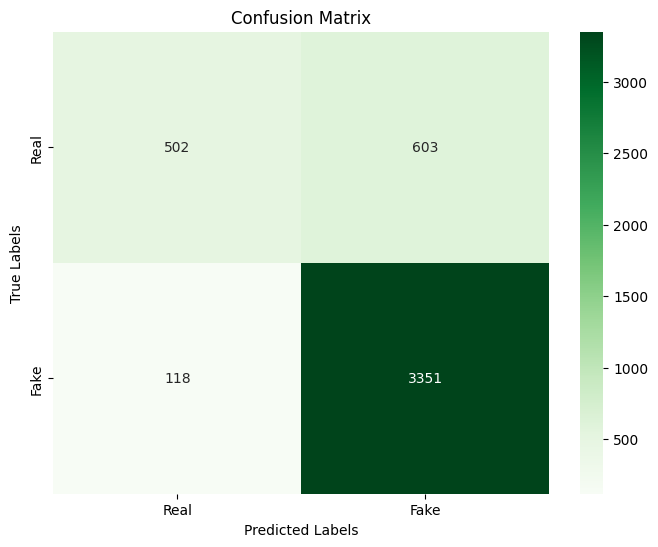

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()